# 解答例：Week2 授業前課題2 ダミーデータの作成

## ダミーデータの作成

機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

### 【問題1】乱数の作成

平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[
\begin{array}{ccc}
  1.0 & 0.8\\
  0.8 & 1.0
\end{array}
\right]
$$

多次元の正規分布による乱数は`np.random.multivariate_normal()`を使うことで作成できます。

[numpy.random.multivariate_normal — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html)

作成したndarrayのshapeは(500, 2)になります。

**シード値について**

実行ごとに値が変わらないように、`np.random.seed()`により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

```py
np.random.seed(0)
```

（解説）

`np.random.multivariate_normal()`のドキュメントを見て、平均や共分散行列、個数をどのような引数で指定するかを確認してください。

それぞれの値は変数として置いておくことで可読性が高まります。`np.random.multivariate_normal([-3, 0], [[1, 0.8], [0.8, 1]], 500)`のように直接書いてあると、それぞれが何を意味していたかが掴みづらくなります。

In [2]:
np.random.seed(0)

In [3]:
n_samples = 500
cov = [[1, 0.8], [0.8, 1]]
mean_data1 = [-3, 0]

data1 = np.random.multivariate_normal(mean_data1, cov, n_samples)

print("作成したデータのshape：{}".format(data1.shape))

作成したデータのshape：(500, 2)


In [4]:
print("作成したデータ\n{}".format(data1))

作成したデータ
[[-4.80006782e+00 -1.54698618e+00]
 [-4.63714503e+00 -2.19879728e-01]
 [-4.46267867e+00 -2.08076347e+00]
 [-3.85346966e+00 -9.49196365e-01]
 [-3.03192065e+00  2.27764648e-01]
 [-3.59653339e+00  3.23229932e-01]
 [-3.76046080e+00 -6.83506760e-01]
 [-3.52660272e+00 -3.15568548e-01]
 [-4.35253112e+00 -1.48228460e+00]
 [-3.02691331e+00 -5.67090887e-01]
 [-7.84713550e-01  2.62867115e+00]
 [-3.58538300e+00 -1.05476937e+00]
 [-4.69336749e+00 -2.61318911e+00]
 [-2.98421761e+00 -1.02603072e-01]
 [-4.91877408e+00 -9.89469999e-01]
 [-3.26658152e+00 -2.74105461e-02]
 [-1.53138965e+00  2.15844669e-01]
 [-2.71938344e+00  3.79500330e-01]
 [-4.54738211e+00 -7.86930327e-01]
 [-2.53695299e+00  2.71853959e-01]
 [-1.55620621e+00  5.45695585e-01]
 [-1.99817931e+00  2.23559938e+00]
 [-2.37797023e+00  3.44967255e-01]
 [-2.05735800e+00  1.43437007e+00]
 [-1.40164768e+00  1.46380355e+00]
 [-2.27283514e+00  9.71863483e-01]
 [-2.14205902e+00  1.11243624e-01]
 [-3.10871442e+00  1.62186440e-01]
 [-3.1587537

### 【問題2】散布図による可視化

問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibの`plt.scatter()`を使うことで描けます。

[matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

（解説）

問題1同様にドキュメントから使い方を学んでください。

そして、1列目と2列目のデータが必要なことが分かりますので、`data1[:, 0]`、`data1[:, 1]`のようなスライシングを行ってください。

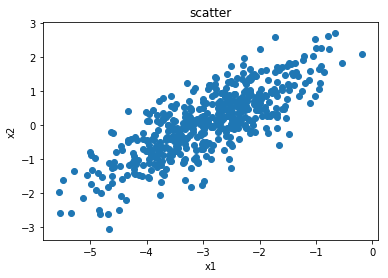

In [5]:
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(data1[:, 0], data1[:, 1])
plt.show()

### 【問題3】ヒストグラムによる可視化

問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムは`plt.hist()`を使うことで描けます。

[matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲は`plt.xlim()`を用いて揃えるようにしてください。

[matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html)

（解説）

ヒストグラムにすることで正規分布であることが分かりやすくなります。

`plt.xlim()`を使うことで、平均の違いがはっきりします。グラフを複数描く際は範囲が揃っていた方が見やすいのではないかという点を意識するようにしてください。ここでは縦軸は揃えていませんが、揃えるのも良いでしょう。

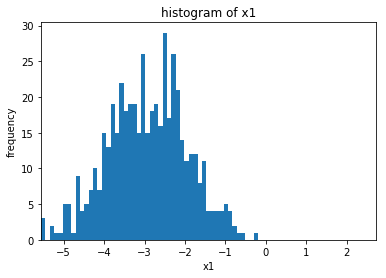

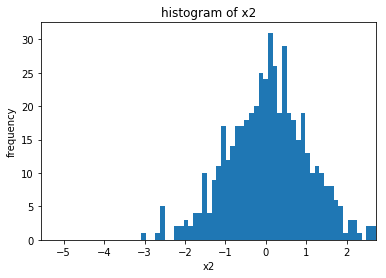

In [6]:
# minメソッド、maxメソッドで横軸の範囲を得ておく。
data1_min = data1.min()
data1_max = data1.max()

plt.title("histogram of x1")
plt.xlabel("x1")
plt.ylabel("frequency")
plt.hist(data1[:, 0], bins=50) # ヒストグラムのbinの数は任意
plt.xlim([data1_min, data1_max])
plt.show()
plt.title("histogram of x2")
plt.xlabel("x2")
plt.ylabel("frequency")
plt.hist(data1[:, 1], bins=50)
plt.xlim([data1_min, data1_max])
plt.show()

### 【問題4】データの追加

新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\left[
\begin{array}{ccc}
  1.0 & 0.8\\
  0.8 & 1.0
\end{array}
\right]
$$

（解説）

乱数の作成は問題1と全く同じようにやるだけです。

In [7]:
n_samples = 500
cov = [[1, 0.8], [0.8, 1]]
mean_data2 = [0, -3]

data2 = np.random.multivariate_normal(mean_data2, cov, n_samples)

print("新たに作成したデータのshape：{}".format(data1.shape))

新たに作成したデータのshape：(500, 2)


In [8]:
print("新たに作成したデータ\n{}".format(data1))

新たに作成したデータ
[[-4.80006782e+00 -1.54698618e+00]
 [-4.63714503e+00 -2.19879728e-01]
 [-4.46267867e+00 -2.08076347e+00]
 [-3.85346966e+00 -9.49196365e-01]
 [-3.03192065e+00  2.27764648e-01]
 [-3.59653339e+00  3.23229932e-01]
 [-3.76046080e+00 -6.83506760e-01]
 [-3.52660272e+00 -3.15568548e-01]
 [-4.35253112e+00 -1.48228460e+00]
 [-3.02691331e+00 -5.67090887e-01]
 [-7.84713550e-01  2.62867115e+00]
 [-3.58538300e+00 -1.05476937e+00]
 [-4.69336749e+00 -2.61318911e+00]
 [-2.98421761e+00 -1.02603072e-01]
 [-4.91877408e+00 -9.89469999e-01]
 [-3.26658152e+00 -2.74105461e-02]
 [-1.53138965e+00  2.15844669e-01]
 [-2.71938344e+00  3.79500330e-01]
 [-4.54738211e+00 -7.86930327e-01]
 [-2.53695299e+00  2.71853959e-01]
 [-1.55620621e+00  5.45695585e-01]
 [-1.99817931e+00  2.23559938e+00]
 [-2.37797023e+00  3.44967255e-01]
 [-2.05735800e+00  1.43437007e+00]
 [-1.40164768e+00  1.46380355e+00]
 [-2.27283514e+00  9.71863483e-01]
 [-2.14205902e+00  1.11243624e-01]
 [-3.10871442e+00  1.62186440e-01]
 [-3.1587

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは`0`、問題2のものは`1`を表示してください。

（解説）

`plt.scatter()`を並べることで複数のデータを重ねられます。複数のデータを表示させた場合は、`label`引数と`plt.legend()`により凡例を入れることが大切です。

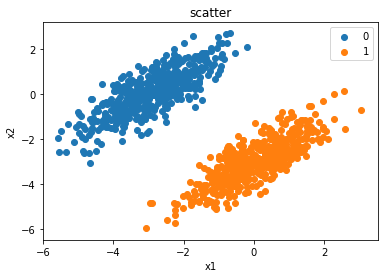

In [9]:
plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(data1[:, 0], data1[:, 1], label="0")
plt.scatter(data2[:, 0], data2[:, 1], label="1")
plt.legend()
plt.show()

### 【問題5】データの結合

データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを **結合** し、(1000, 2)のndarrayとしてください。結合は`np.concatenate()`や`np.vstack()`を使うことで行えます。

[numpy.concatenate — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

[numpy.vstack — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)

（解説）

結合する際は方向や順番に注意が必要です。今回は縦に2個並べたいので、`np.concatenate()`で`axis=0`を指定するか、`np.vstack()`を使います。もし横方向であれば`np.concatenate()`で`axis=1`を指定するか、`np.hstack()`を使います。

（解答例１）

In [10]:
data = np.concatenate([data1, data2], axis=0)
print(data.shape)

(1000, 2)


（解答例２）

In [11]:
data = np.vstack([data1, data2])
print(data.shape)

(1000, 2)


### 【問題6】ラベル付け

ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す **ラベル** 付けを行ってください。問題1のものには`0`、問題4のものには`1`を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

（解説）

何らかしらの方法で0と1のndarrayを作成し、それを問題5までのndarrayと結合します。0と1のndarrayの作成方法はいろいろと考えられるため、複数紹介します。

（解答例１）

まず考えられるのは`np.zeros()`と`np.ones`を使い0と1のndarrayを作る方法です。そしてそれを問題5と同じように`np.concatenate()`などによって結合します。

In [12]:
label1 = np.zeros((n_samples, 1))  # shape(500, 1)
label2 = np.ones((n_samples, 1))  # shape(500, 1)

label = np.concatenate([label1, label2], axis=0) # shape(1000, 1)

data_with_label = np.concatenate([data, label], axis=1)  # shape(1000, 3)

print("作成したndarray\n{}".format(data_with_label))

作成したndarray
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]


（解答例２）

作成したラベルのndarrayが`(1000,)`の場合は、結合時にdataと軸の数を合わせる必要があります。ndarrayを扱う際は軸の数を意識することが大切です。

`np.newaxis`を使い、`label[:, np.newaxis]`のようにすることで軸を増やすことができます。他にも`label.reshape(-1, 1)`という方法もありますが、`np.newaxis`を使う方が新しい軸であることが分かりやすいためこちらを推奨します。

In [13]:
label1 = np.zeros(n_samples) # shape(500,)
label2 = np.ones(n_samples) # shape(500,)
label = np.concatenate([label1, label2], axis=0) # shape(1000,)

data_with_label = np.concatenate([data, label[:, np.newaxis]], axis=1)  # shape(1000, 3)

In [14]:
print("label.shape : {}".format(label.shape))
print("label[:, np.newaxis].shape : {}".format(label[:, np.newaxis].shape))
print("label.reshape(-1, 1).shape : {}".format(label.reshape(-1, 1).shape))

label.shape : (1000,)
label[:, np.newaxis].shape : (1000, 1)
label.reshape(-1, 1).shape : (1000, 1)


（解答例３）

`np.zeros()`と`np.ones()`の代わりに`np.full()`を使うこともできます。これは任意の値で埋めたndarrayを作る関数です。0と1以外への拡張が行いやすくなります。

In [15]:
label1 = np.full((n_samples, 1), 0)  # shape(500, 1)
label2 = np.full((n_samples, 1), 1)  # shape(500, 1)

label = np.concatenate([label1, label2], axis=0) # shape(1000, 1)

data_with_label = np.concatenate([data, label], axis=1)  # shape(1000, 3)

（解答例４）

`np.empty()`で空のndarrayを作り、そこにスライシングで値を埋めていくという方法も考えられます。

はじめのndarrayは`np.zeros()`などで作っても同じことができますが、`np.empty()`は空であることを明示できるのでこのような場合には推奨されます。

In [16]:
label = np.empty((data.shape[0], 1)).astype(np.int) # shape(1000, 1)
label[:n_samples] = 0
label[n_samples:] = 1

data_with_label = np.concatenate([data, label], axis=1) # shape(1000, 3)